In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/global_housing_market_extended.csv')
df.head()

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201
1,USA,2016,150.807258,51.440915,11.729189,5.662213,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,USA,2017,123.194502,70.386040,8.506676,2.197469,2.398940,0.930895,0.596245,83.555279,85.973903
3,USA,2018,131.423444,91.469020,3.418054,4.537724,1.608407,-1.479587,2.321099,88.968961,134.671788
4,USA,2019,110.461377,56.837048,9.158097,3.700762,1.293249,1.961415,-0.879640,87.279612,90.702399


In [ ]:
df.columns

Index(['Country', 'Year', 'House Price Index', 'Rent Index',
       'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)',
       'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)',
       'Construction Index'],
      dtype='object')

STATISTICAL SUMMARY

In [ ]:
df.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748


TOP 5 GDP COUNTRIES

In [ ]:
# Sort countries by GDP growth in descending order
top_gdp_countries = df.groupby('Country')['GDP Growth (%)'].mean().sort_values(ascending=False)

# Print the top countries
print(top_gdp_countries.head()) # Print the top 5 countries

Country
Italy          3.563861
South Korea    3.347766
UK             3.157140
Japan          3.142350
Russia         2.711182
Name: GDP Growth (%), dtype: float64


CORRELATION ANALYSIS

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['House Price Index', 'Rent Index', 'Affordability Ratio', 'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)', 'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index']].corr()

# Print the correlation matrix
print(correlation_matrix)

                       House Price Index  Rent Index  Affordability Ratio  \
House Price Index               1.000000    0.098280            -0.132869   
Rent Index                      0.098280    1.000000            -0.053381   
Affordability Ratio            -0.132869   -0.053381             1.000000   
Mortgage Rate (%)               0.069741   -0.000694            -0.010473   
Inflation Rate (%)              0.050327    0.020875            -0.003447   
GDP Growth (%)                 -0.080581   -0.098396            -0.036567   
Population Growth (%)           0.076943    0.008684            -0.034430   
Urbanization Rate (%)          -0.005663   -0.022523            -0.180839   
Construction Index             -0.108723   -0.026966            -0.045611   

                       Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
House Price Index               0.069741            0.050327       -0.080581   
Rent Index                     -0.000694            0.020875       -0

PRICE INDEX VS RENT INDEX

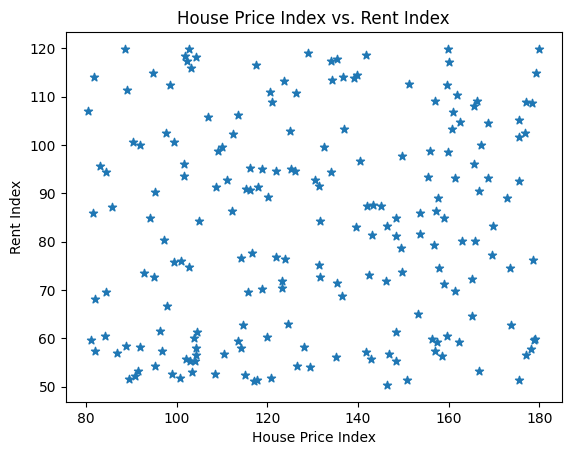

In [ ]:
# Create a scatter plot of house price index vs. rent index
plt.scatter(df['House Price Index'], df['Rent Index'],marker='*')
plt.xlabel('House Price Index')
plt.ylabel('Rent Index')
plt.title('House Price Index vs. Rent Index')
plt.show()

DISTRIBUTION OF AFFORDABILITY RATIO

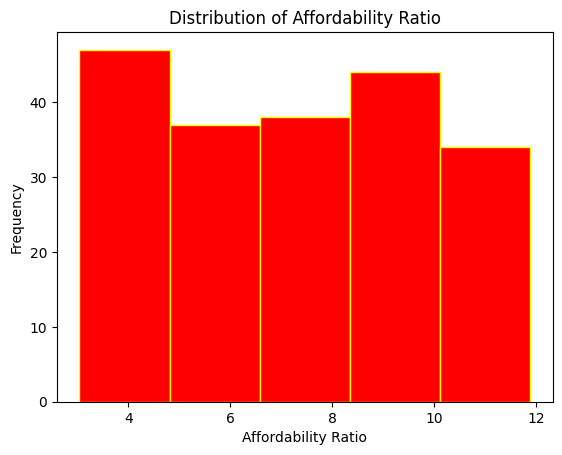

In [ ]:
# Create a histogram of affordability ratio
plt.hist(df['Affordability Ratio'],bins=5,color='red',edgecolor='yellow')
plt.xlabel('Affordability Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Affordability Ratio')
plt.show()

ANALYSING TREND OVER TIME

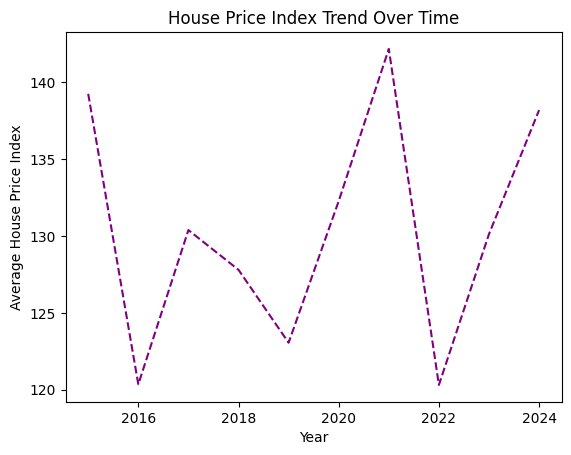

In [ ]:
# Group data by year and calculate the average house price index
yearly_trends = df.groupby('Year')['House Price Index'].mean()

# Plot the trend
plt.plot(yearly_trends.index, yearly_trends.values,color='purple',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average House Price Index')
plt.title('House Price Index Trend Over Time')
plt.show()

COUNTRY SPECIFIC ANALYSIS

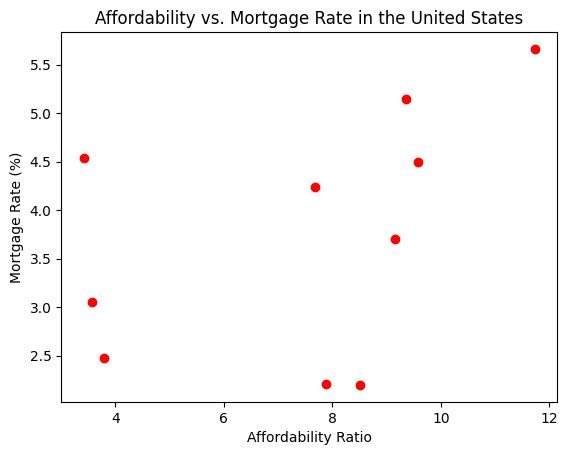

In [ ]:
# Filter data for a specific country (e.g., 'United States')
country_data = df[df['Country'] == 'USA']

# Create a scatter plot of affordability ratio vs. mortgage rate for that country
plt.scatter(country_data['Affordability Ratio'], country_data['Mortgage Rate (%)'],color='red')
plt.xlabel('Affordability Ratio')
plt.ylabel('Mortgage Rate (%)')
plt.title('Affordability vs. Mortgage Rate in the United States')
plt.show()

AVERAGE HOUSE PRICE BY INDEX

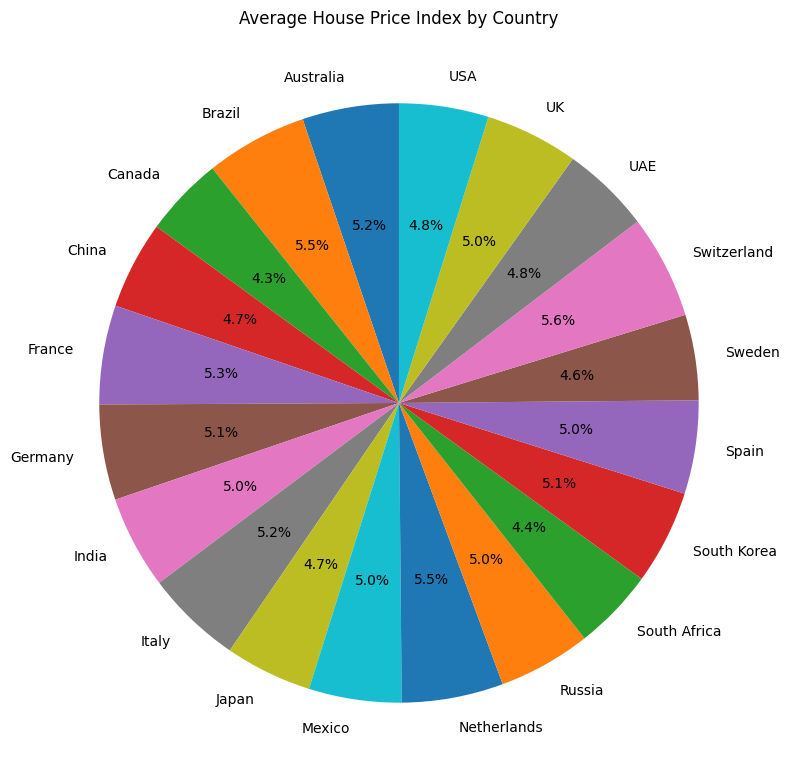

In [ ]:
import matplotlib.pyplot as plt

# Group data by country and calculate the average house price index
average_house_price_by_country = df.groupby('Country')['House Price Index'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
average_house_price_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average House Price Index by Country')
plt.ylabel('')  # Remove the default ylabel
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

COUNTRY WISE URBANIZATION RATE AND CONSTRUCTION INDEX

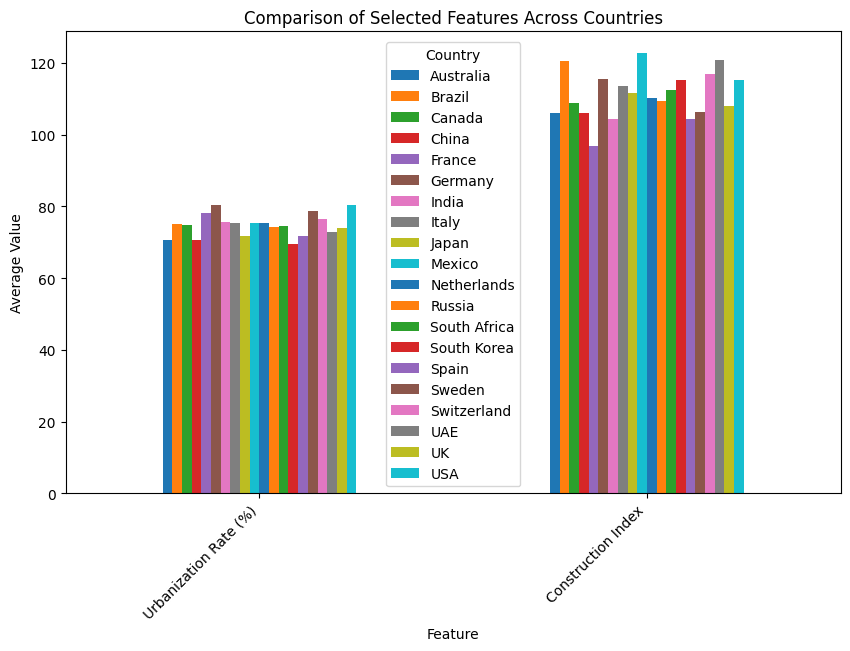

In [ ]:
# Group data by country and calculate the average values for the selected features
grouped_data = df.groupby('Country')[['Urbanization Rate (%)', 'Construction Index']].mean()

# Transpose the data for plotting
transposed_data = grouped_data.transpose()

# Create a bar chart
transposed_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Selected Features Across Countries')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.show()